G드라이브와 연동

In [1]:
from google.colab import drive 
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# 하위 파일 확인

In [4]:
!ls "/gdrive/My Drive/Colab Notebooks"

 CNN
'Emotion Detection (with KNN only in Colab)'
 Face_Detection
 fer2013.csv
 First_Project
'(에러 다수) Keras-tuner를 활용한 MNIST Classification (Colab-only).ipynb'
'Project_Practice(lr=0.001).ipynb'
'Project_Practice(unit=256).ipynb'
'Project_Practice(unit=4096).ipynb'
 Semi-Project
'Semi-Project(Deep-Learning)'


data에 압축파일 옮기기(dog_cat.zip)


datasets 폴더만들기


In [0]:
import os
make_dir = '/gdrive/My Drive/Colab Notebooks/datasets'

try:
    if not(os.path.isdir(make_dir)):
        os.makedirs(os.path.join(make_dir))
except OSError as e:
    if e.errno != errno.EEXIST:
        print("Failed to create directory!!!!!")
        raise

압출풀기


In [0]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('/gdrive/My Drive/Colab Notebooks/CNN/data/dog_cat.zip') #파일경로
fantasy_zip.extractall('/gdrive/My Drive/Colab Notebooks/datasets') # 압축해제할 경로
 
fantasy_zip.close()

In [0]:
import os, shutil

In [0]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '/gdrive/My Drive/Colab Notebooks/datasets'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '/gdrive/My Drive/Colab Notebooks/datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


5.2.5 데이터 증식 사용하기(p193)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)




Epoch 1/30





100/100 [==============================] - 32s 324ms/step - loss: 0.6932 - acc: 0.5355 - val_loss: 0.7279 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 18s 181ms/step - loss: 0.6619 - acc: 0.6140 - val_loss: 0.6392 - val_acc: 0.6500
Epoch 3/30
100/100 [==============================] - 17s 172ms/step - loss: 0.6044 - acc: 0.6705 - val_loss: 0.6277 - val_acc: 0.6360
Epoch 4/30
100/100 [==============================] - 18s 181ms/step - loss: 0.5676 - acc: 0.7070 - val_loss: 0.6042 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 17s 174ms/step - loss: 0.5411 - acc: 0.7215 - val_loss: 0.6051 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 19s 191ms/step - loss: 0.5129 - acc: 0.7485 - val_loss: 0.5755 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 18s 181ms/step - loss: 0.4849 - acc: 0.7665 - val_loss: 0.5658 - val_acc: 0.7070
Epoch 8/30
100/100 [===========================

model 폴더만들기

In [0]:
import os
make_dir = '/gdrive/My Drive/Colab Notebooks/model'

try:
    if not(os.path.isdir(make_dir)):
        os.makedirs(os.path.join(make_dir))
except OSError as e:
    if e.errno != errno.EEXIST:
        print("Failed to create directory!!!!!")
        raise

생성한 model 폴더에 생성한 모델 저장하기

In [0]:
model.save('/gdrive/My Drive/Colab Notebooks/model/cats_and_dogs_small_1.h5')

In [0]:
import matplotlib.pyplot as plt

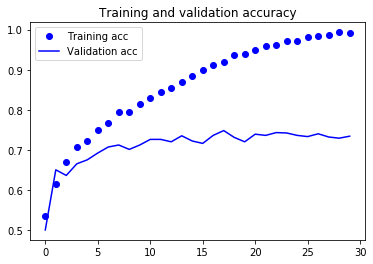

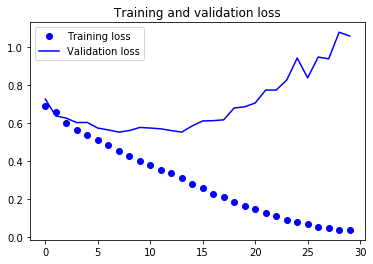

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

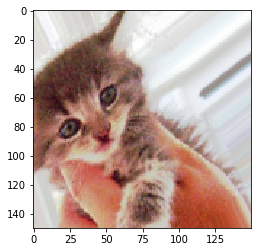

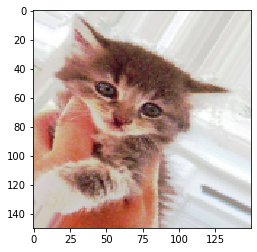

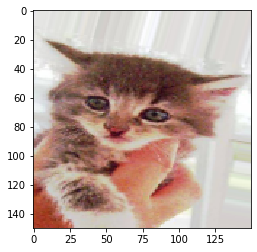

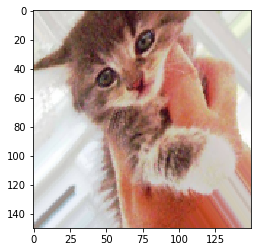

In [23]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 49s 485ms/step - loss: 0.6924 - acc: 0.5150 - val_loss: 0.6775 - val_acc: 0.5615
Epoch 2/100
100/100 [==============================] - 43s 434ms/step - loss: 0.6734 - acc: 0.5688 - val_loss: 0.6604 - val_acc: 0.5857
Epoch 3/100
100/100 [==============================] - 43s 429ms/step - loss: 0.6565 - acc: 0.5897 - val_loss: 0.6694 - val_acc: 0.5806
Epoch 4/100
100/100 [==============================] - 42s 419ms/step - loss: 0.6333 - acc: 0.6272 - val_loss: 0.6326 - val_acc: 0.6430
Epoch 5/100
100/100 [==============================] - 41s 413ms/step - loss: 0.6310 - acc: 0.6403 - val_loss: 0.6036 - val_acc: 0.6669
Epoch 6/100
100/100 [==============================] - 45s 447ms/step - loss: 0.6048 - acc: 0.6678 - val_loss: 0.5950 - val_acc: 0.6849
Epoch 7/100
100/100 [==============================] - 42s 425ms/step - loss: 0.6073 - acc: 0.6628 -

KeyboardInterrupt: ignored

In [0]:
model.save('/gdrive/My Drive/Colab Notebooks/model/cats_and_dogs_small_2.h5')

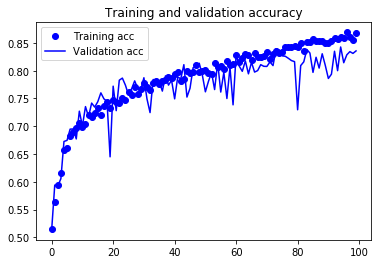

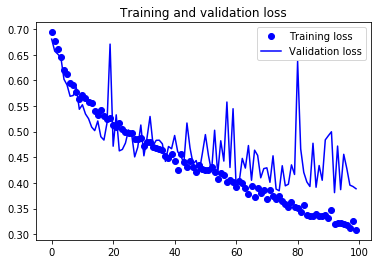

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

5.3 사전훈련된 컨브넷 사용하기(실습진행)

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


입력과 출력 지정하기

In [0]:
im_rows = 28
im_cols = 28
im_color = 1
in_shape = (im_rows, im_cols, im_color)
out_size = 10

MNIST 데이터 읽어 들이기

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


읽어들인 데이터를 3차원 배열로 변환하기

In [0]:
X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype('float32') / 255

레이블 데이터를 One-hot 형식으로 변환하기

In [0]:
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'), 10)

CNN 모델 구조 정의하기

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


모델 컴파일하기

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

학습하기

In [8]:
hist = model.fit(X_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 20s 328us/step - loss: 0.2193 - acc: 0.9332 - val_loss: 0.0534 - val_acc: 0.9825
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0812 - acc: 0.9757 - val_loss: 0.0394 - val_acc: 0.9870
Epoch 3/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0655 - acc: 0.9809 - val_loss: 0.0379 - val_acc: 0.9864
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0543 - acc: 0.9847 - val_loss: 0.0388 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0524 - acc: 0.9847 - val_loss: 0.0351 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0526 - acc: 0.9852 - val_loss: 0.0350 - val_acc: 0.9904
Epoch 7/12
60000/60000 [

모델 평가하기

In [9]:
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률 =', score[1], 'loss=', score[0])

10000/10000 [==============================] - 1s 63us/step
정답률 = 0.9911 loss= 0.033747968170707875


학습 상태를 그래프로 그리기

정답률 추이를 그래프로 그리기

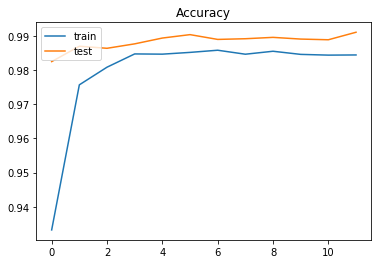

In [10]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

손실 추이를 그래프로 그리기

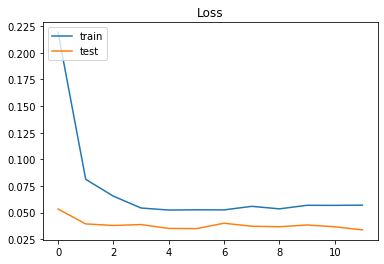

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()